In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, TNK test function

This is the class method for running Xopt.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [2]:
# Import the class
from xopt import Xopt

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [9]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null, verbose: true}

algorithm:
  name: bayesian_exploration
  options: {n_initial_samples: 5,
            use_gpu: False,
            restart_data_file: opt_data.pkl,
            n_steps: 20, 
            verbose: True}
  
simulation: 
  name: test_TNK
  evaluate: xopt.evaluators.test_TNK.evaluate_TNK  
  
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

In [10]:
# Optional: Connect the function directly
#from xopt.evaluators.test_TNK import evaluate_TNK 
#config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(config)
X

Loading config as dict.



            Xopt 
________________________________           
Version: 0.4.3
Configured: True
Config as YAML:
xopt: {output_path: null, verbose: true}
algorithm:
  name: bayesian_exploration
  function: xopt.bayesian_exploration.bayesian_exploration
  options: {n_initial_samples: 5, use_gpu: false, restart_data_file: 'C:\Users\Ryan
      Roussel\Documents\GitHub\xopt\examples\bayes_exp\opt_data.pkl', n_steps: 20,
    verbose: true}
simulation:
  name: test_TNK
  evaluate: xopt.evaluators.test_TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

In [11]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 0.08505059050746575,
 'y2': 3.032129700698291,
 'c1': 8.110942031396734,
 'c2': 6.583863833596618,
 'some_array': array([1, 2, 3])}

# Run CNSGA

CNSGA is designed to run in parallel with an asynchronous executor as defined in PEP 3148

In [12]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [13]:
# Change max generations
X.run(executor=executor)

Starting at time 2021-08-04T16:55:45-05:00
tensor([[1.1905, 0.4829]], dtype=torch.float64)
tensor([[0.7699, 1.1341]], dtype=torch.float64)
tensor([[0.0627, 1.0366]], dtype=torch.float64)
tensor([[1.0837, 0.8699]], dtype=torch.float64)
tensor([[1.0327, 0.0585]], dtype=torch.float64)
tensor([[0.8288, 0.5771]], dtype=torch.float64)
tensor([[1.1827, 0.3913]], dtype=torch.float64)
tensor([[0.5290, 1.1908]], dtype=torch.float64)
tensor([[0.6034, 0.8756]], dtype=torch.float64)
tensor([[0.2643, 1.1505]], dtype=torch.float64)
tensor([[1.1116, 0.8287]], dtype=torch.float64)
tensor([[0.8477, 1.0991]], dtype=torch.float64)
tensor([[0.4888, 0.9115]], dtype=torch.float64)
tensor([[0.9344, 0.4168]], dtype=torch.float64)
tensor([[0.2512, 1.0014]], dtype=torch.float64)
tensor([[0.0618, 1.0405]], dtype=torch.float64)
tensor([[1.1886, 0.4039]], dtype=torch.float64)
tensor([[1.0454, 0.0659]], dtype=torch.float64)
tensor([[0.6974, 0.7554]], dtype=torch.float64)
tensor([[0.6317, 1.1824]], dtype=torch.float6

# Plot

tensor([[2.0877, 0.2405],
        [1.8249, 0.1465],
        [0.3600, 1.8046],
        [0.2112, 0.0595],
        [1.1403, 0.0789],
        [3.1416, 3.1416],
        [0.0000, 1.2335],
        [0.8985, 0.9265],
        [0.5928, 1.0608],
        [1.0778, 0.6843],
        [0.3289, 1.0882],
        [0.9283, 0.5573],
        [1.1501, 0.6737],
        [0.8818, 1.0373],
        [0.1798, 1.0604],
        [0.7106, 0.7750],
        [1.0497, 0.1119],
        [0.0712, 1.0127],
        [0.6477, 1.1612],
        [1.1703, 0.4572],
        [1.0293, 0.9317],
        [1.0413, 0.0744],
        [0.4337, 0.9512],
        [0.8927, 0.5377],
        [0.3678, 1.1728],
        [1.1905, 0.4829],
        [0.7699, 1.1341],
        [0.0627, 1.0366],
        [1.0837, 0.8699],
        [1.0327, 0.0585],
        [0.8288, 0.5771],
        [1.1827, 0.3913],
        [0.5290, 1.1908],
        [0.6034, 0.8756],
        [0.2643, 1.1505],
        [1.1116, 0.8287],
        [0.8477, 1.0991],
        [0.4888, 0.9115],
        [0.9

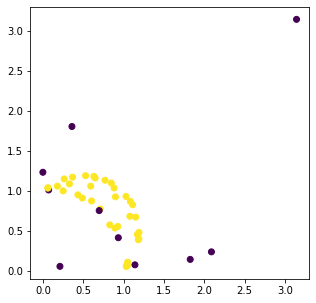

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

train_x = X.results['inputs']
print(train_x)
feas = X.results['feasibility']
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(*train_x.T, c = feas.int())
